In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.svm import SVC
import matplotlib.pyplot as plt 

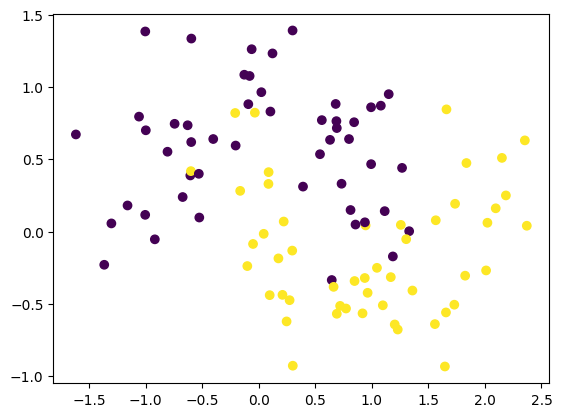

In [2]:
X_train,y_train = make_moons(n_samples=100,noise=0.3,random_state=2)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()


In [6]:
model = SVC(C=1.0,kernel="rbf",gamma=10.0)#gammaの値を変えて、正しく分離できていそうなところを探す
model.fit(X_train,y_train)

# Cやgammaを大きくすると過学習傾向

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,10.0
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
axis = np.linspace(-1.7,2.5)
xx,yy = np.meshgrid(axis,axis)
X_test = np.c_[xx.ravel(),yy.ravel()]
pred_test = model.predict(X_test)

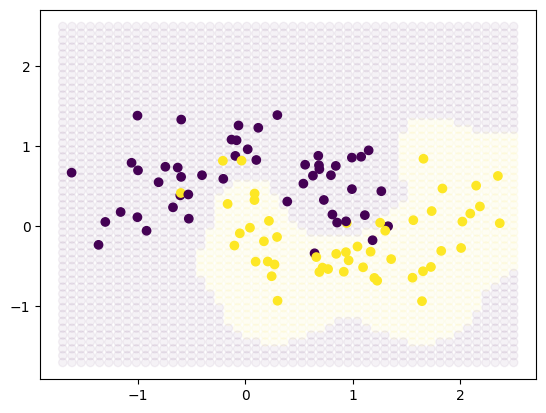

In [8]:
plt.scatter(X_test[:,0],X_test[:,1],c=pred_test,alpha=0.05)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

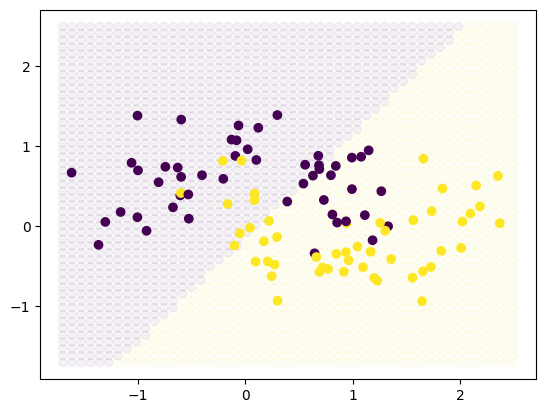

In [9]:
model = SVC(C=1.0,kernel="rbf",gamma=0.001)#gammaを小さくすると線形になったりする
model.fit(X_train,y_train)

axis = np.linspace(-1.7,2.5)
xx,yy = np.meshgrid(axis,axis)
X_test = np.c_[xx.ravel(),yy.ravel()]
pred_test = model.predict(X_test)

plt.scatter(X_test[:,0],X_test[:,1],c=pred_test,alpha=0.05)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

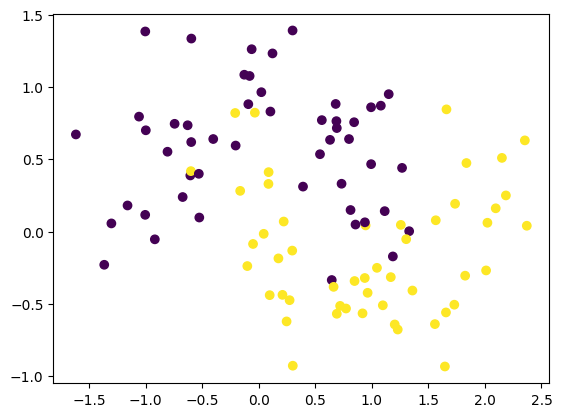

In [10]:
X,y = make_moons(n_samples=1000,noise=0.3,random_state=2)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score

%pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [12]:
import optuna

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = SVC(C=1.0,kernel="rbf",gamma=10)
model.fit(X_train,y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print(f"train_accuracy{accuracy_score(y_train,pred_train)},test_accuracy{accuracy_score(y_test,pred_test)}")

train_accuracy0.92625,test_accuracy0.915


In [ ]:
cross_validate(estimator=model,X=X_train,y=y_train,cv=5,scoring="accuracy")
#テストスコアが高くなるようなハイパーパラメーターを調整する

{'fit_time': array([0.00570774, 0.00586796, 0.00541115, 0.00491786, 0.00570989]),
 'score_time': array([0.00211573, 0.00187325, 0.00184679, 0.00148201, 0.00191212]),
 'test_score': array([0.90625, 0.95   , 0.8875 , 0.875  , 0.88125])}

## ここからoptunaについて

In [17]:
def f(x,y):
    s = 2*x+y-5
    t = x-y-2

    return s**2 + t**2

In [18]:
f(1,-2)

26

In [20]:
def objective(trial):
    x = trial.suggest_float("x",-5,5) #-5から5の範囲で探索
    y = trial.suggest_float("y",-5,5)

    return f(x,y)

In [ ]:
study = optuna.create_study(direction="minimize")#目標は最小化
study.optimize(objective,n_trials=20)#20回探索

[I 2025-09-02 13:43:17,250] A new study created in memory with name: no-name-6ace3e24-0012-40db-8222-a210781b4cb4
[I 2025-09-02 13:43:17,253] Trial 0 finished with value: 22.2862679120879 and parameters: {'x': 2.352100915810703, 'y': -3.014065055866518}. Best is trial 0 with value: 22.2862679120879.
[I 2025-09-02 13:43:17,254] Trial 1 finished with value: 151.28155390617798 and parameters: {'x': -3.4489666427555754, 'y': 2.5825778199494565}. Best is trial 0 with value: 22.2862679120879.
[I 2025-09-02 13:43:17,256] Trial 2 finished with value: 20.641109243738995 and parameters: {'x': 0.4218165135196159, 'y': 2.737983519357482}. Best is trial 2 with value: 20.641109243738995.
[I 2025-09-02 13:43:17,257] Trial 3 finished with value: 47.26922744747233 and parameters: {'x': 2.947232366702864, 'y': -4.747152783357665}. Best is trial 2 with value: 20.641109243738995.
[I 2025-09-02 13:43:17,258] Trial 4 finished with value: 73.35055014353573 and parameters: {'x': -1.7037825638501114, 'y': 2.28

In [28]:
def objective(trial):
    C = trial.suggest_float("C",0.01,100,log=True)
    gamma = trial.suggest_float("gamma",0.01,100,log=True)

    model = SVC(C=C, kernel="rbf",gamma=gamma)
    result = cross_validate(estimator=model,X=X_train,y=y_train,cv=5,scoring="accuracy")
    return result["test_score"].mean()

In [29]:
optuna.logging.set_verbosity(optuna.logging.WARNING) #探索ログを表示しない
study = optuna.create_study(direction="maximize")#目標は最小化
study.optimize(objective,n_trials=100)#20回探索

In [30]:
#結果の確認
study.best_params

{'C': 0.45184390386640333, 'gamma': 2.717972946033492}

In [31]:
study.best_value#accuracy_score

0.905

In [ ]:
model = SVC(C=study.best_params["C"],kernel="rbf",gamma=study.best_params["gamma"])
model.fit(X_train,y_train)


pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print(f"train_accuracy{accuracy_score(y_train,pred_train)},test_accuracy{accuracy_score(y_test,pred_test)}")

#ハイパーパラメーター探索は、trainデータのみで行うのが定石

train_accuracy0.9125,test_accuracy0.925


# ここから練習

In [6]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.svm import SVC
import matplotlib.pyplot as plt

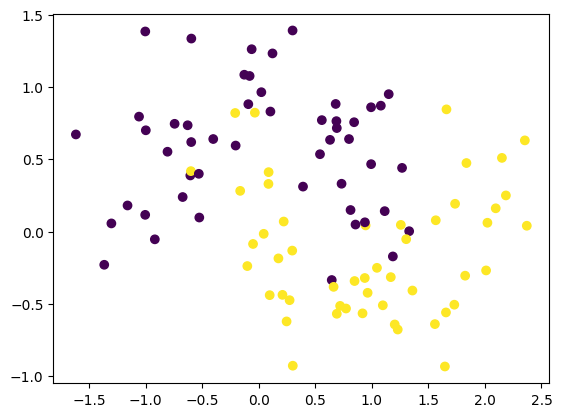

In [7]:
X_train,y_train = make_moons(n_samples=100,noise=0.3,random_state=2)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

In [10]:
model = SVC(C=1.0,kernel="rbf",gamma=10.0)
model.fit(X_train,y_train)
#C:誤分類をどれだけ許すかのハイパーパラメーター

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,10.0
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
axis = np.linspace(-1.7,2.5)
xx,yy = np.meshgrid(axis,axis)
X_test = np.c_[xx.ravel(),yy.ravel()]
#c_で列方向で結合
pred_test = model.predict(X_test)

In [18]:
xx

array([[-1.7       , -1.61428571, -1.52857143, ...,  2.32857143,
         2.41428571,  2.5       ],
       [-1.7       , -1.61428571, -1.52857143, ...,  2.32857143,
         2.41428571,  2.5       ],
       [-1.7       , -1.61428571, -1.52857143, ...,  2.32857143,
         2.41428571,  2.5       ],
       ...,
       [-1.7       , -1.61428571, -1.52857143, ...,  2.32857143,
         2.41428571,  2.5       ],
       [-1.7       , -1.61428571, -1.52857143, ...,  2.32857143,
         2.41428571,  2.5       ],
       [-1.7       , -1.61428571, -1.52857143, ...,  2.32857143,
         2.41428571,  2.5       ]], shape=(50, 50))

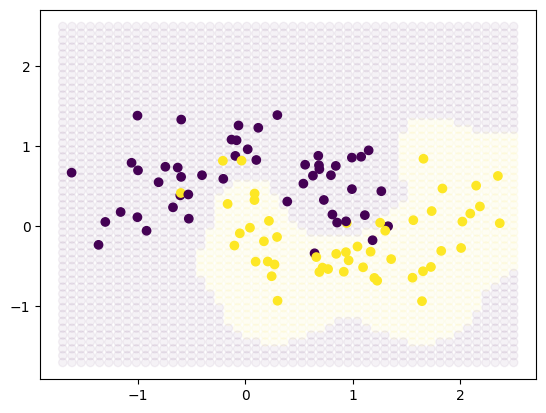

In [22]:
plt.scatter(X_test[:,0],X_test[:,1],c=pred_test,alpha=0.05)
#境界の図示
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

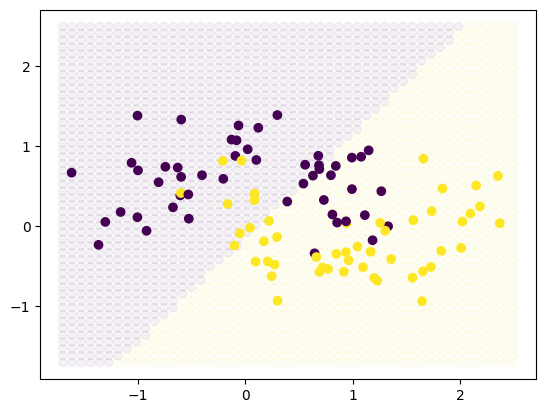

In [23]:
model = SVC(C=1.0,kernel="rbf",gamma=0.001)
model.fit(X_train,y_train)

axis = np.linspace(-1.7,2.5)
xx,yy = np.meshgrid(axis,axis)
X_test = np.c_[xx.ravel(),yy.ravel()]
pred_test = model.predict(X_test)

plt.scatter(X_test[:,0],X_test[:,1],c=pred_test,alpha=0.05)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()


In [24]:
X_test

array([[-1.7       , -1.7       ],
       [-1.61428571, -1.7       ],
       [-1.52857143, -1.7       ],
       ...,
       [ 2.32857143,  2.5       ],
       [ 2.41428571,  2.5       ],
       [ 2.5       ,  2.5       ]], shape=(2500, 2))

In [25]:
import optuna

/home/haruk/workspace/ml-workspace-202507/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


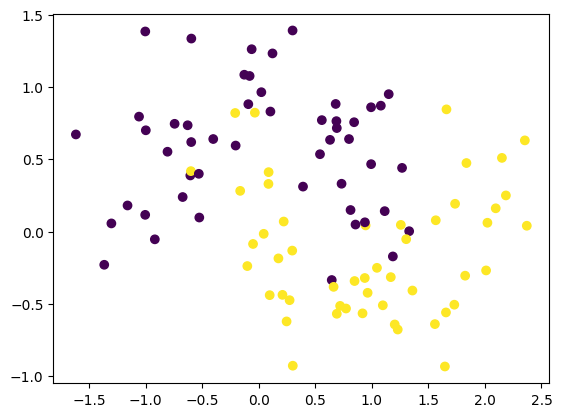

In [26]:
X,y = make_moons(n_samples=1000,noise=0.3,random_state=2)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2)
model = SVC(C=1.0,kernel="rbf",gamma=10)
model.fit(X_train,y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print(f"train_accuracy{accuracy_score(y_train,pred_train)}")
print(f"test_accuracy{accuracy_score(y_test,pred_test)}")

train_accuracy0.9225
test_accuracy0.915


In [31]:
#交差検証
cross_validate(estimator=model,X=X_train,y=y_train,cv=5,scoring="accuracy")

{'fit_time': array([0.00571108, 0.00570583, 0.00576687, 0.00514007, 0.00534034]),
 'score_time': array([0.00191236, 0.00182414, 0.00185776, 0.00167131, 0.00180745]),
 'test_score': array([0.91875, 0.9    , 0.925  , 0.88125, 0.925  ])}

### optuna

In [33]:
def f(x,y):
    s = 2*x + y - 5
    t = x - y - 2

    return s ** 2 + t ** 2

In [34]:
f(1,-2)

26

In [35]:
def objective(trial):
    x = trial.suggest_float("x",-5,5)
    y = trial.suggest_float("y",-5,5)

    return f(x,y)

In [36]:
study = optuna.create_study(direction="minimize")
study.optimize(objective,n_trials=20)

[I 2025-09-16 16:53:48,048] A new study created in memory with name: no-name-2eb0a77e-19c3-4833-9ad2-ffe4518ea254
[I 2025-09-16 16:53:48,053] Trial 0 finished with value: 71.75147396348142 and parameters: {'x': 4.488249792061826, 'y': 4.298442987252175}. Best is trial 0 with value: 71.75147396348142.
[I 2025-09-16 16:53:48,056] Trial 1 finished with value: 9.256588315256138 and parameters: {'x': 1.459042549182752, 'y': 2.475890497771572}. Best is trial 1 with value: 9.256588315256138.
[I 2025-09-16 16:53:48,057] Trial 2 finished with value: 212.48043753322634 and parameters: {'x': -2.4348172557934844, 'y': -4.7045778767585125}. Best is trial 1 with value: 9.256588315256138.
[I 2025-09-16 16:53:48,059] Trial 3 finished with value: 20.028409487425332 and parameters: {'x': 1.3774676769818264, 'y': -2.009802190991433}. Best is trial 1 with value: 9.256588315256138.
[I 2025-09-16 16:53:48,060] Trial 4 finished with value: 44.486533381738674 and parameters: {'x': -0.8101130199827349, 'y': 2.

In [37]:
def objective(trial):
    C = trial.suggest_float("C",0.01,100,log=True)
    gamma = trial.suggest_float("gamma",0.01,100,log=True)

    model = SVC(C=C,kernel="rbf",gamma=gamma)
    result = cross_validate(estimator=model,X=X_train,y=y_train)
    return result["test_score"].mean()

In [38]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=20)

In [39]:
study.best_params

{'C': 1.1756823734585704, 'gamma': 2.2434508378244784}

In [40]:
study.best_value

0.91875